In [ ]:
!git clone https://github.com/Apress/mastering-ml-w-python-in-six-steps.git

Cloning into 'mastering-ml-w-python-in-six-steps'...
remote: Enumerating objects: 167, done.
remote: Total 167 (delta 0), reused 0 (delta 0), pack-reused 167
Receiving objects: 100% (167/167), 20.14 MiB | 16.59 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
!ln -s mastering-ml-w-python-in-six-steps/Chapter_6_Codes/Code/Data Data

コード 6.1

In [ ]:
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.clf()

# いくつかのテストデータの作成のために sklearnの
# make_classification関数を使用しよう
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=20, n_features=20, weights=[.5, .5], random_state=2017)
# モデルの作成
clf = Perceptron(max_iter=100, verbose=0, random_state=2017, fit_intercept=True, eta0=0.002)
clf.fit(X,y)
# 結果の表示
print ("Prediction: " + str(clf.predict(X)))
print ("Actual: " + str(y))
print ("Accuracy: " + str(clf.score(X, y)*100) + "%") # 値の出力
print ("X1 Coefficient: " + str(clf.coef_[0,0]))
print ("X2 Coefficient: " + str(clf.coef_[0,1]))
print ("Intercept: " + str(clf.intercept_))

Prediction: [1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0]
Actual: [1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0]
Accuracy: 100.0%
X1 Coefficient: 0.0002968195078632063
X2 Coefficient: -0.0010384917782035386
Intercept: [-0.002]


<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'X2')

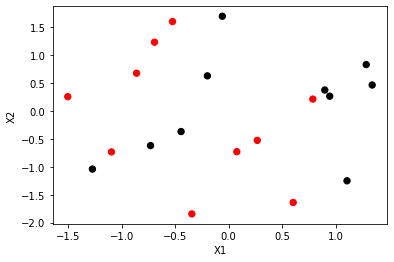

In [ ]:
# plot the data
colormap = np.array(['r', 'k'])
plt.scatter(X[:,0], X[:,1], c=colormap[y], s=40)
plt.xlabel('X1')
plt.ylabel('X2')

Python機械学習プログラミング[第2版] 

In [ ]:
import numpy as np
def plot_decision_regions(X, y, classifier):
    
    h = .02  # step size in the mesh
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                           np.arange(x2_min, x2_max, h))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [ ]:
# カスタム関数’decision_regions'により
# 決定境界 (decision boundary)をプロット
plot_decision_regions(X, y, classifier=clf)
plt.title('Perceptron Model Decision Boundry')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.show()

ValueError: ignored

In [ ]:
plt.clf()

<Figure size 432x288 with 0 Axes>

コード 6.2

We have 1797 samples


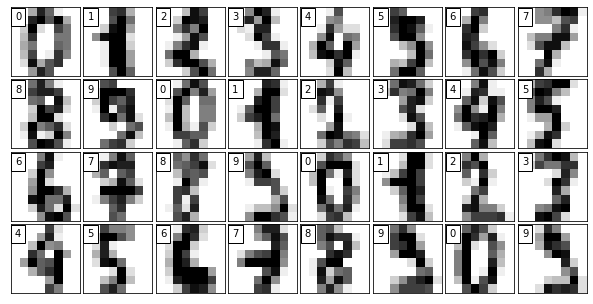

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
np.random.seed(seed=2017)
# データの読み込み
digits = load_digits()
print('We have %d samples'%len(digits.target))
# データの直観的に理解するために先頭の先頭の32サンプルをプロット
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(32):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.gray_r)
    ax.text(0, 1, str(digits.target[i]), bbox=dict(facecolor='white'))

https://www.kaggle.com/code/vincentkr18/beginner-autoencoders-using-keras/notebook#

コードコード6.11

In [ ]:
import numpy as np
np.random.seed(2017)
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
#from keras.optimizers import Adadelta
from keras.utils import np_utils
from IPython.display import SVG
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import model_to_dot
from matplotlib import pyplot as plt
# MNISTデータのロード
input_unit_size = 28*28
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 数字をプロットするための関数
def draw_digit(data, row, col, n):
    size = int(np.sqrt(data.shape[0]))
    plt.subplot(row, col, n)
    plt.imshow(data.reshape(size, size))
    plt.gray()

# 正規化
X_train = X_train.reshape(X_train.shape[0], input_unit_size)
X_train = X_train.astype('float32')
X_train /= 255
print('X_train shape:', X_train.shape)

X_train shape: (60000, 784)


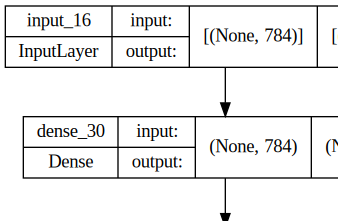

In [ ]:
# オートエンコーダー
inputs = Input(shape=(input_unit_size,))
x = Dense(144, activation='relu')(inputs)
outputs = Dense(input_unit_size)(x)
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='mse', optimizer='adadelta')
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [ ]:
model.fit(X_train, X_train, epochs=10, batch_size=1)

Epoch 1/10
60000/60000 [==============================] - 165s 3ms/step - loss: 0.1010
Epoch 2/10
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0692
Epoch 3/10
60000/60000 [==============================] - 162s 3ms/step - loss: 0.0639
Epoch 4/10
60000/60000 [==============================] - 172s 3ms/step - loss: 0.0615
Epoch 5/10
60000/60000 [==============================] - 171s 3ms/step - loss: 0.0592
Epoch 6/10
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0568
Epoch 7/10
60000/60000 [==============================] - 168s 3ms/step - loss: 0.0544
Epoch 8/10
60000/60000 [==============================] - 180s 3ms/step - loss: 0.0520
Epoch 9/10
60000/60000 [==============================] - 177s 3ms/step - loss: 0.0498
Epoch 10/10
60000/60000 [==============================] - 180s 3ms/step - loss: 0.0478


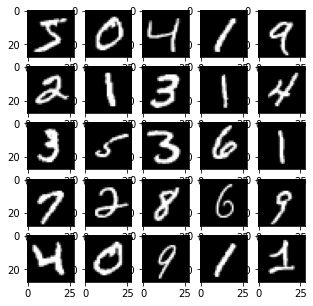

In [ ]:
# 入力層からの画像のプロット
show_size = 5
total = 0
plt.figure(figsize=(5,5))
for i in range(show_size):
    for j in range(show_size):
        draw_digit(X_train[total], show_size, show_size, total+1)
        total+=1
plt.show()

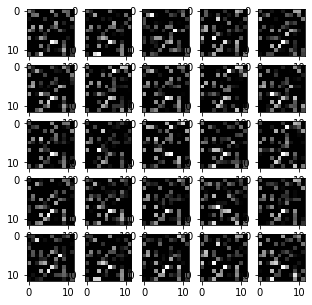

In [ ]:
# エンコード(圧縮)層の画像をプロット
get_layer_output = K.function([model.layers[0].input], [model.layers[1].output])
hidden_outputs = get_layer_output([X_train[0:show_size**2]])[0]
total = 0
plt.figure(figsize=(5,5))
for i in range(show_size):
     for j in range(show_size):
        draw_digit(hidden_outputs[total], show_size, show_size, total+1)
        total+=1
plt.show()

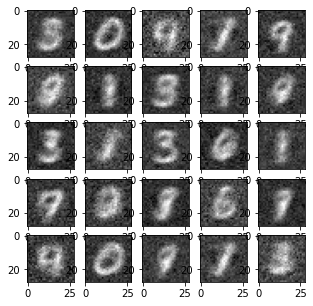

In [ ]:
# デコード(復号)層の画像のプロット
get_layer_output = K.function([model.layers[0].input],
              [model.layers[2].output])
last_outputs = get_layer_output([X_train[0:show_size**2]])[0]
total = 0
plt.figure(figsize=(5,5))
for i in range(show_size):
     for j in range(show_size):
        draw_digit(last_outputs[total], show_size, show_size, total+1)
        total+=1
plt.show()

コード 6.12

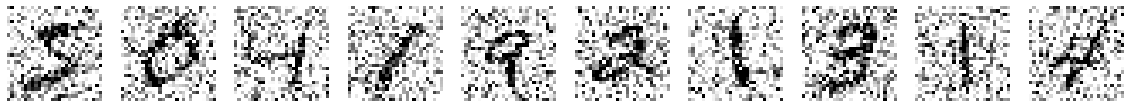

In [ ]:
# 画像へのノイズの導入
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0,
  scale=1.0, size=X_train.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
# 可視化のための関数
def draw(data, row, col, n):
    plt.subplot(row, col, n)
    plt.imshow(data, cmap=plt.cm.gray_r)
    plt.axis('off')
show_size = 10
plt.figure(figsize=(20,20))
for i in range(show_size):
    draw(X_train_noisy[i].reshape(28,28), 1, show_size, i+1)
plt.show()

Epoch 1/10
60000/60000 [==============================] - 182s 3ms/step - loss: 0.0617
Epoch 2/10
60000/60000 [==============================] - 178s 3ms/step - loss: 0.0589
Epoch 3/10
60000/60000 [==============================] - 173s 3ms/step - loss: 0.0570
Epoch 4/10
60000/60000 [==============================] - 172s 3ms/step - loss: 0.0555
Epoch 5/10
60000/60000 [==============================] - 171s 3ms/step - loss: 0.0541
Epoch 6/10
60000/60000 [==============================] - 174s 3ms/step - loss: 0.0529
Epoch 7/10
60000/60000 [==============================] - 172s 3ms/step - loss: 0.0518
Epoch 8/10
60000/60000 [==============================] - 183s 3ms/step - loss: 0.0508
Epoch 9/10
60000/60000 [==============================] - 179s 3ms/step - loss: 0.0500
Epoch 10/10
60000/60000 [==============================] - 180s 3ms/step - loss: 0.0491


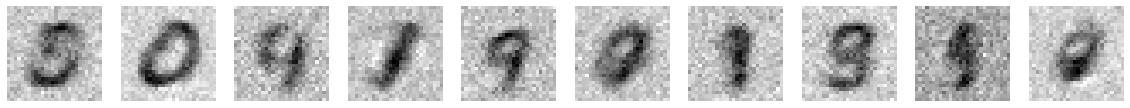

In [ ]:
# ノイズの入った訓練データセットの適合
model.fit(X_train_noisy, X_train, epochs=10, batch_size=1) # ノイズ除去されたイメージの予測
X_train_pred = model.predict(X_train_noisy)
show_size = 10
plt.figure(figsize=(20,20))
for i in range(show_size):
    draw(X_train_pred[i].reshape(28,28), 1, show_size, i+1)
plt.show()

コード 6.13

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
np.random.seed(2017)

from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Activation, Convolution2D, MaxPooling2D, Flatten
from keras.utils import np_utils
from keras.preprocessing import sequence

from keras import backend as K
from IPython.display import SVG, display
from keras.utils.vis_utils import model_to_dot

https://stackoverflow.com/questions/56469879/setting-google-colab-to-use-theano-as-backend

In [ ]:
import os
os.environ["KERAS_BACKEND"] = "theano"

In [1]:
import keras
keras.backend.backend()
# keras.backend.image_dim_ordering() 古いKeras
keras.backend.image_data_format()

# Ensure to set the image dimension appropriately
K = keras.backend.backend()

In [2]:
import keras
if K=='tensorflow':
    keras.backend.set_image_data_format('channels_first')
else:
    keras.backend.set_image_data_format('channels_last')
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras import backend as K
from IPython.display import SVG, display
from keras.utils.vis_utils import model_to_dot, plot_model
import numpy as np
np.random.seed(2017)
img_rows, img_cols = 32, 32
img_channels = 3
batch_size = 256
nb_classes = 10
nb_epoch = 4
nb_filters = 10
nb_conv = 3
nb_pool = 2
kernel_size = 3
# 畳み込みカーネルのサイズ
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 3)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

170508288/170498071 [==============================] - 2s 0us/step
X_train shape: (50000, 3, 32, 32)
50000 train samples
10000 test samples


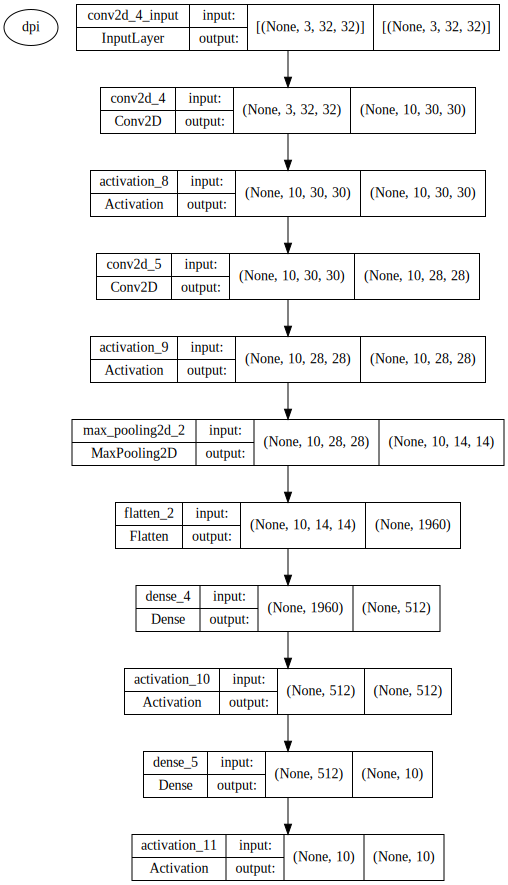

In [21]:
# 2 グループの層の定義: 特徴量(畳み込み)と分類 (全結合/デンス)
feature_layers = [
Conv2D(nb_filters, kernel_size, input_shape=input_shape), Activation('relu'),
Conv2D(nb_filters, kernel_size),
Activation('relu'),
MaxPooling2D(pool_size=(nb_pool, nb_pool)),
Flatten(), ]

classification_layers = [
    Dense(512),
    Activation('relu'),
    Dense(nb_classes),
    Activation('softmax')
]
# 完全なモデルの作成
model = Sequential(feature_layers + classification_layers)
model.compile(loss='categorical_crossentropy', optimizer="adadelta", metrics=['accuracy'])
SVG(model_to_dot(model, show_shapes=True, dpi=None).create(prog='dot', format='svg'))

In [15]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 10, 30, 30)        280       
                                                                 
 activation (Activation)     (None, 10, 30, 30)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 28, 28)        910       
                                                                 
 activation_1 (Activation)   (None, 10, 28, 28)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 14, 14)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1960)              0         
                                                        

In [4]:
# モデルの適合
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=nb_epoch,
    batch_size=batch_size, verbose=2)

Epoch 1/4
196/196 - 11s - loss: 2.3145 - accuracy: 0.0982 - val_loss: 2.3016 - val_accuracy: 0.1016 - 11s/epoch - 57ms/step
Epoch 2/4
196/196 - 1s - loss: 2.2916 - accuracy: 0.1188 - val_loss: 2.2830 - val_accuracy: 0.1272 - 1s/epoch - 7ms/step
Epoch 3/4
196/196 - 1s - loss: 2.2751 - accuracy: 0.1300 - val_loss: 2.2675 - val_accuracy: 0.1342 - 1s/epoch - 7ms/step
Epoch 4/4
196/196 - 1s - loss: 2.2602 - accuracy: 0.1408 - val_loss: 2.2527 - val_accuracy: 0.1451 - 1s/epoch - 7ms/step


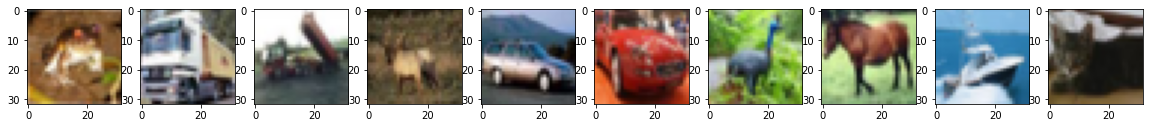

In [22]:
# 可視化のための関数
# 可視化
def draw(data, row, col, n):
    plt.subplot(row, col, n)    
    plt.imshow(data)
### 入力層(元画像)
show_size = 10
plt.figure(figsize=(20,20))
for i in range(show_size):
    draw(X_train[i].reshape(3, 32, 32).transpose(1, 2, 0), 1, show_size, i+1)
plt.show()


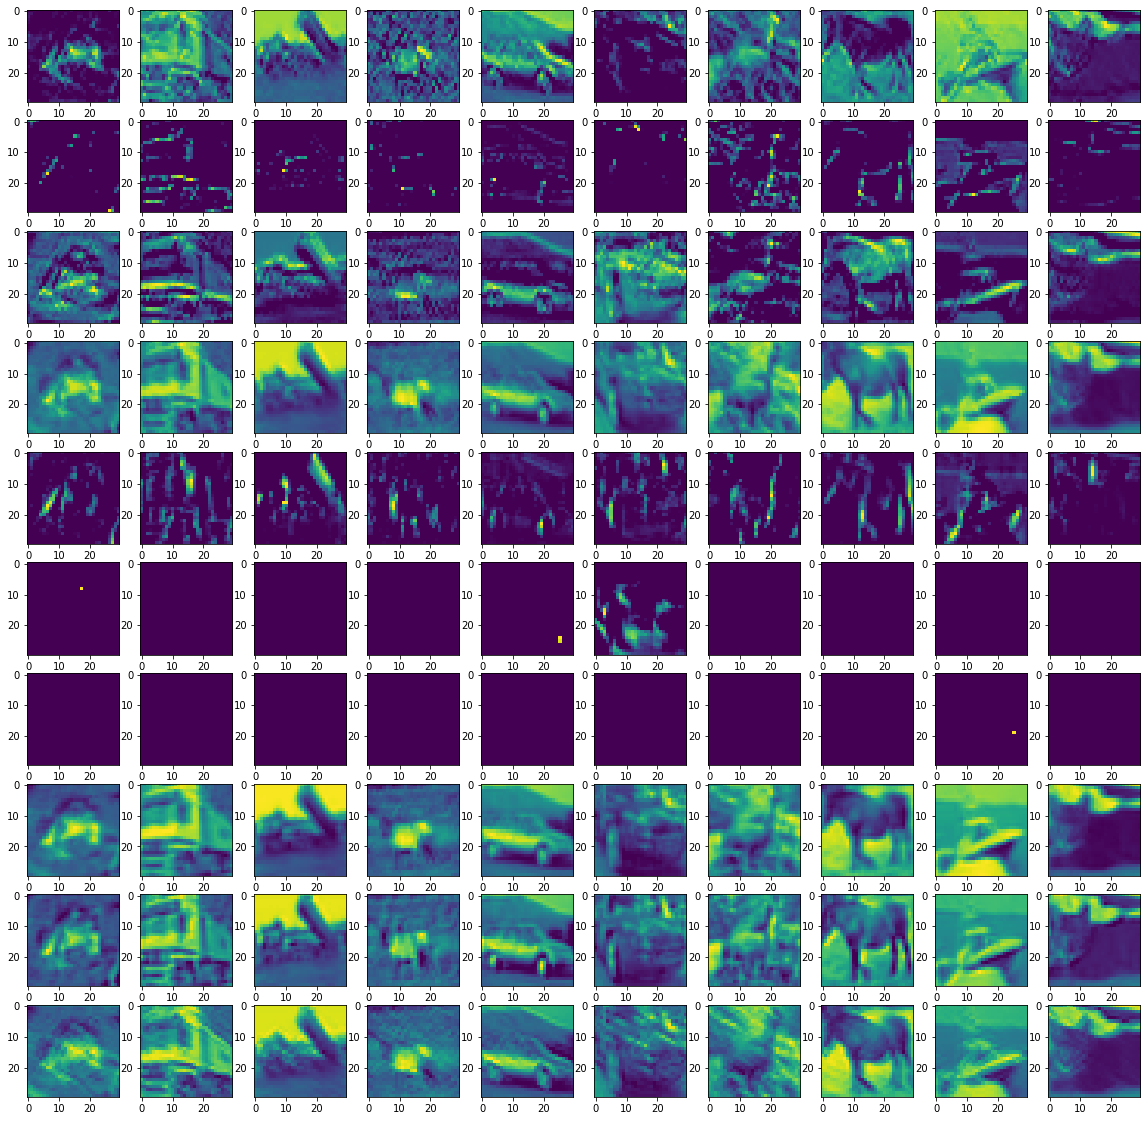

In [24]:
get_first_layer_output = K.function([model.layers[0].input],
                          [model.layers[1].output])
first_layer = get_first_layer_output([X_train[0:show_size]])[0]

plt.figure(figsize=(20,20))

for img_index, filters in enumerate(first_layer, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*show_size+img_index
        draw(mat, nb_filters, show_size, pos)
plt.show()

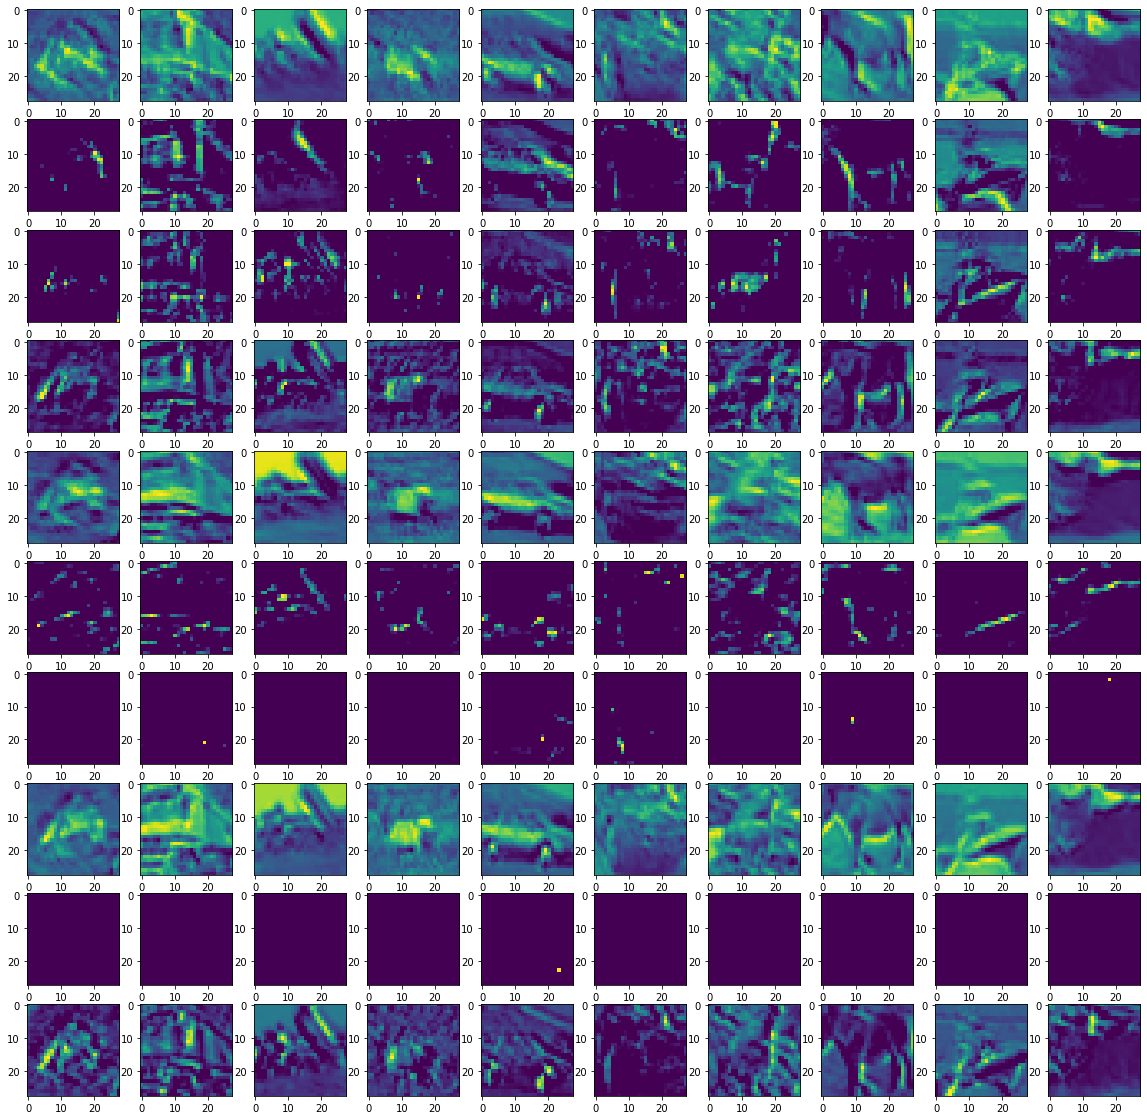

In [25]:
get_second_layer_output = K.function([model.layers[0].input],
                          [model.layers[3].output])
second_layers = get_second_layer_output([X_train[0:show_size]])[0]

plt.figure(figsize=(20,20))

for img_index, filters in enumerate(second_layers, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*show_size+img_index
        draw(mat, nb_filters, show_size, pos)
plt.show()

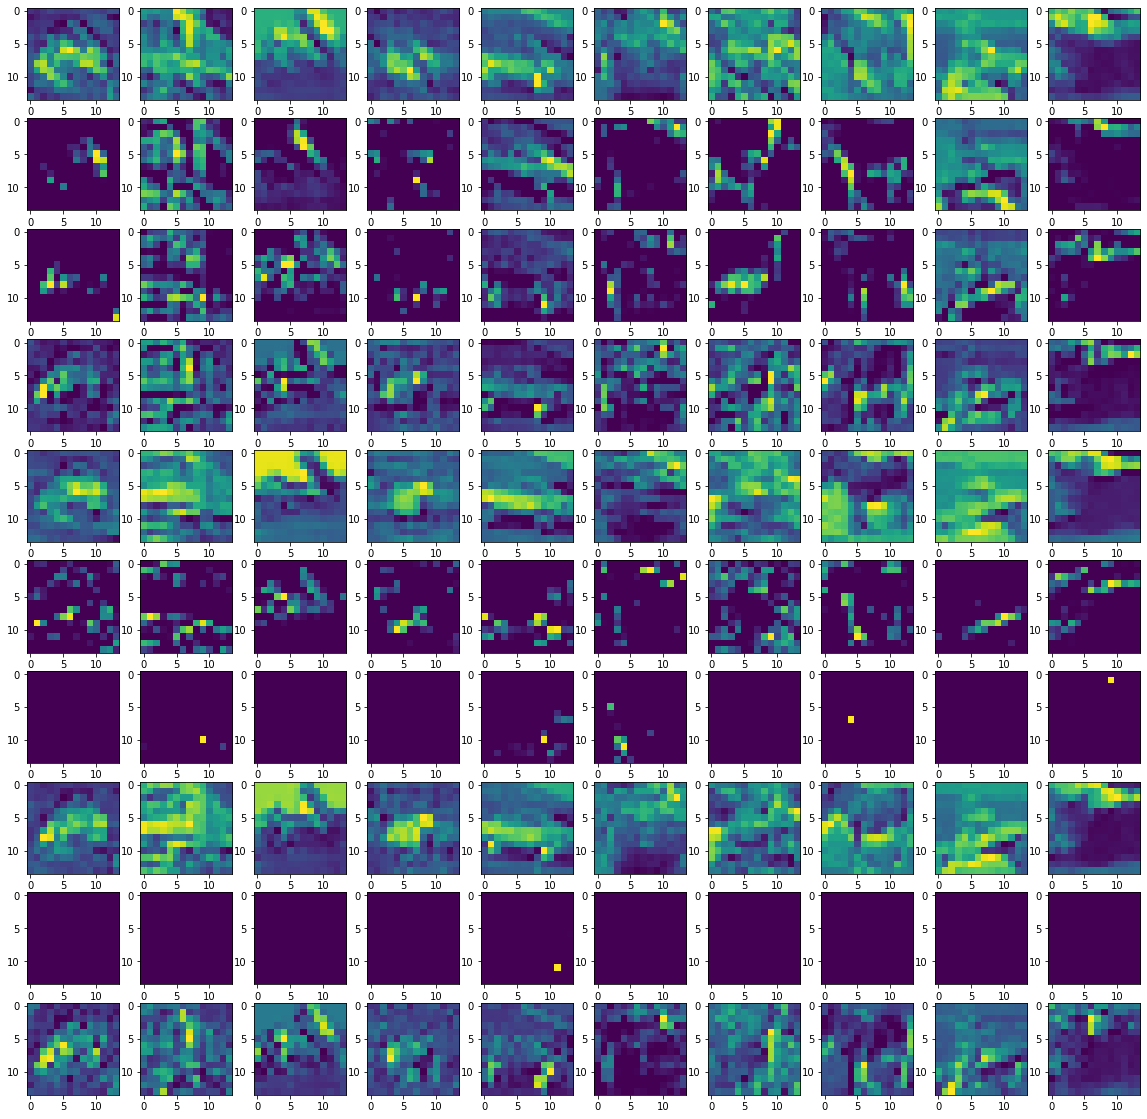

In [26]:
get_third_layer_output = K.function([model.layers[0].input],
                          [model.layers[4].output])
third_layers = get_third_layer_output([X_train[0:show_size]])[0]

plt.figure(figsize=(20,20))

for img_index, filters in enumerate(third_layers, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*show_size+img_index
        mat_size = mat.shape[1]
        draw(mat, nb_filters, show_size, pos)
plt.show()

コード 6.14

In [10]:
import keras
import os
from imp import reload

def set_keras_backend(backend):
    if keras.backend.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend
        reload(keras)
        assert str(keras.backend.backend()) == backend

set_keras_backend("tensorflow")

keras.backend.backend()
# keras.backend.image_dim_ordering() 古いKeras
keras.backend.image_data_format()

# Ensure to set the image dimension appropriately
K = keras.backend.backend()
print(K)

tensorflow


In [17]:
import keras
if K=='tensorflow':
    print("hoge")
    keras.backend.set_image_data_format('channels_first')
else:
    keras.backend.set_image_data_format('channels_last')
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
np.random.seed(2017)

from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils
from keras.preprocessing import sequence
from IPython.display import SVG, display
from keras.utils.vis_utils import model_to_dot, plot_model


img_rows, img_cols = 28, 28
nb_classes = 10

nb_filters = 5 # フィルターの数
nb_pool = 2 # プーリングのウィンドウサイズ
nb_conv = 3 # フィルターのウィンドウあるいはカーネルのサイズ
nb_epoch = 5
kernel_size = 3 # 畳み込みカーネルのサイズ

(X_train, y_train), (X_test, y_test) = mnist.load_data()
if K == 'tensorflow':
    input_shape = (1, img_rows, img_cols)
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1) # データ
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# クラスのベクトルを二値のクラス行列に変換
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

hoge
X_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples


In [18]:
# 2グループの層の定義: 特徴量(畳み込み)と分類(全結合/デンス) (dense)
feature_layers = [
    Conv2D(nb_filters, kernel_size, input_shape=input_shape), Activation('relu'),
    Conv2D(nb_filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size = nb_pool),
    Dropout(0.25),
    Flatten(),
]
classification_layers = [
Dense(128), Activation('relu'), Dropout(0.5), Dense(nb_classes), Activation('softmax')]
# 完全なモデルの作成
model = Sequential(feature_layers + classification_layers)
model.compile(loss='categorical_crossentropy', optimizer="adadelta", metrics=['accuracy'])
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 5, 26, 26)         50        
                                                                 
 activation_12 (Activation)  (None, 5, 26, 26)         0         
                                                                 
 conv2d_7 (Conv2D)           (None, 5, 24, 24)         230       
                                                                 
 activation_13 (Activation)  (None, 5, 24, 24)         0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 12, 12)        0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 5, 12, 12)         0         
                                                      

In [19]:
model.fit(X_train, Y_train, batch_size=256, epochs=nb_epoch, verbose=2,  validation_split=0.2)

Epoch 1/5
188/188 - 4s - loss: 2.3168 - accuracy: 0.0927 - val_loss: 2.3115 - val_accuracy: 0.0922 - 4s/epoch - 20ms/step
Epoch 2/5
188/188 - 1s - loss: 2.3132 - accuracy: 0.0971 - val_loss: 2.3075 - val_accuracy: 0.0999 - 841ms/epoch - 4ms/step
Epoch 3/5
188/188 - 1s - loss: 2.3101 - accuracy: 0.1008 - val_loss: 2.3035 - val_accuracy: 0.1065 - 810ms/epoch - 4ms/step
Epoch 4/5
188/188 - 1s - loss: 2.3066 - accuracy: 0.1042 - val_loss: 2.2996 - val_accuracy: 0.1133 - 788ms/epoch - 4ms/step
Epoch 5/5
188/188 - 1s - loss: 2.3023 - accuracy: 0.1114 - val_loss: 2.2958 - val_accuracy: 0.1213 - 797ms/epoch - 4ms/step


In [25]:
# 可視化
def draw(data, row, col, n):
    plt.subplot(row, col, n)    
    plt.imshow(data, cmap=plt.cm.gray_r)
    plt.axis('off')

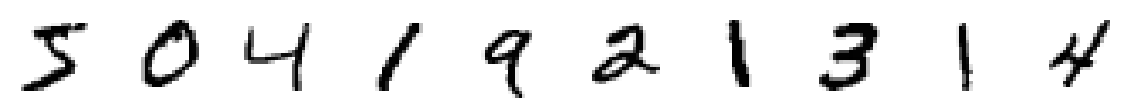

In [26]:
# サンプルの入力層(元の画像)
show_size = 10
plt.figure(figsize=(20,20))

for i in range(show_size):
    draw(X_train[i].reshape(28,28), 1, show_size, i+1)
plt.show()

first layer shape:  (10, 5, 26, 26)


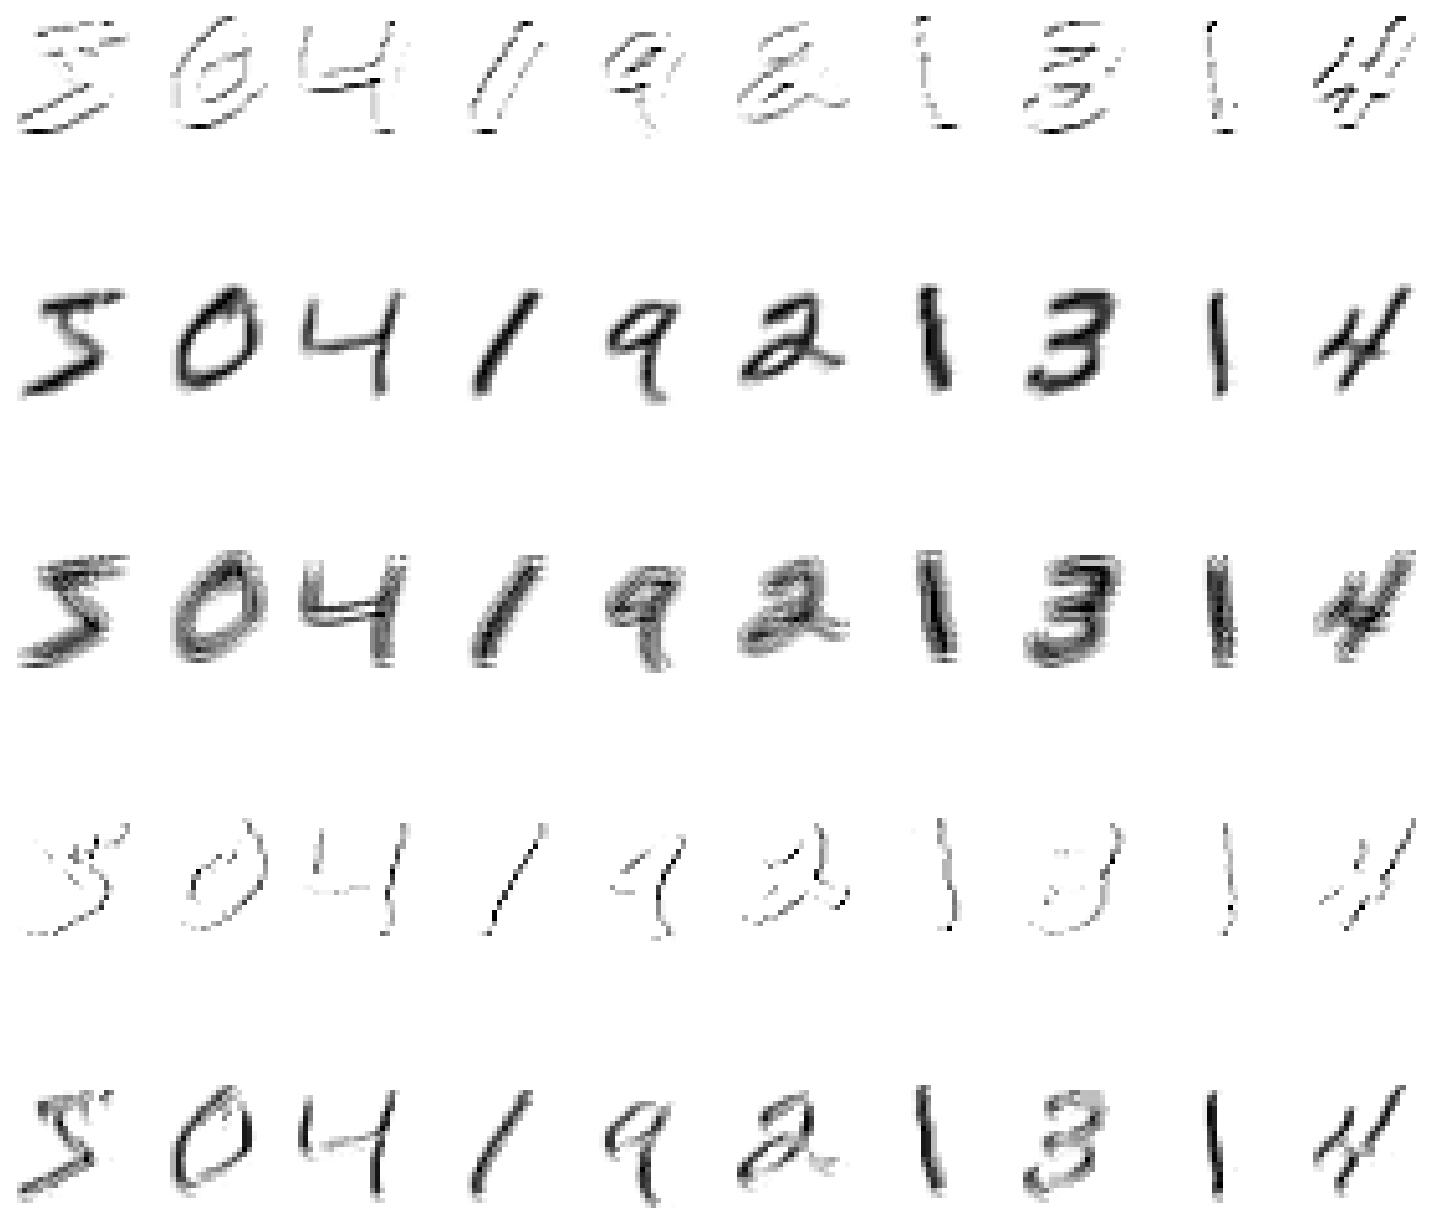

In [28]:
# 5 つのフィルターからなる第一層
get_first_layer_output = keras.backend.function([model.layers[0].input], [model.layers[1].output])
first_layer = get_first_layer_output([X_train[0:show_size]])[0]

plt.figure(figsize=(20,20))
print('first layer shape: ', first_layer.shape)

for img_index, filters in enumerate(first_layer, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*10+img_index
        draw(mat, nb_filters, show_size, pos)
plt.tight_layout()        
plt.show()